In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import ssl
from PIL import Image
from math import floor

In [2]:
# ssl._create_default_https_context = ssl._create_unverified_context
# urllib.request.urlretrieve("https://apod.nasa.gov/apod/image/2401/ngc1232b_vlt_3969.jpg", "galaxy.jpg")

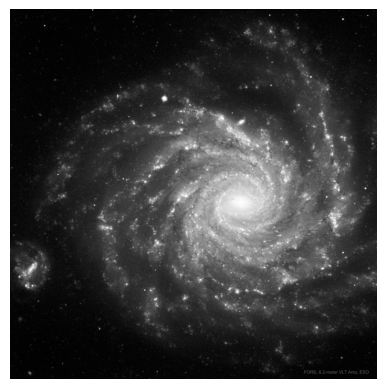

In [3]:
color_image = Image.open("galaxy.jpg")
galaxy = color_image.convert("L")
plt.imshow(galaxy, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
def plot_histogram(I, label):
    I = np.array(I)
    I_clipped = np.clip(I, 0, 255)
    temp = I_clipped.flatten()
    
    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(temp, bins=256, color='gray')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.title(f'{label} Histogram')
    
    # Plot image
    plt.subplot(1, 2, 2)
    plt.imshow(I_clipped, cmap='gray', vmin=0, vmax=255)
    plt.title(f'{label} Image')
    plt.show()
    return

## Question 1

1)

In [55]:
def linear_operation(I,P,L):
    I_ = np.array(I)
    I_ = (P*I_) + L
    I_ = np.floor(I_)
    return I_

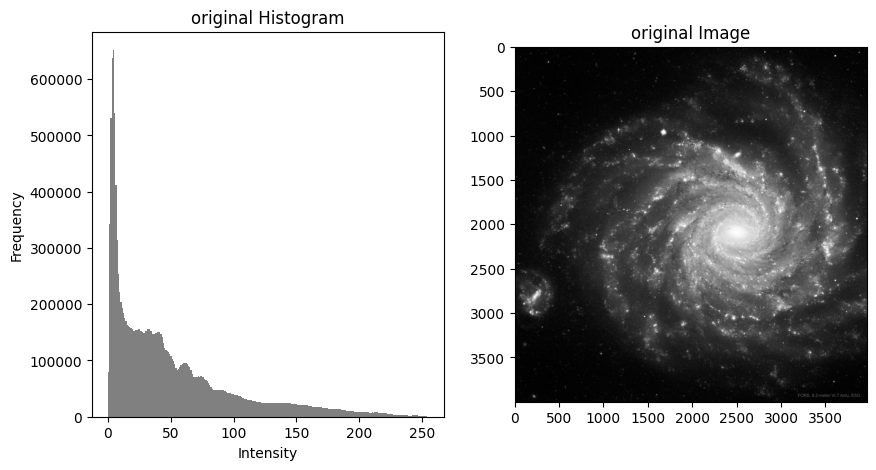

In [6]:
plot_histogram(galaxy,'original')

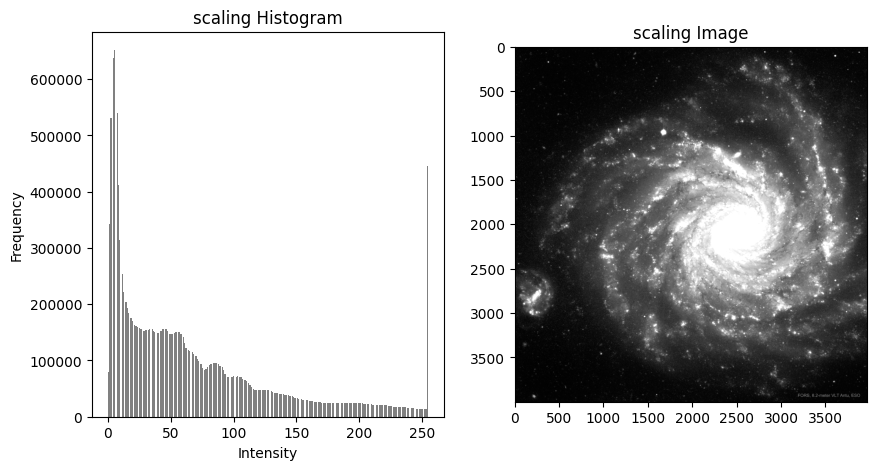

In [7]:
plot_histogram(linear_operation(galaxy,1.4,0),'scaling')

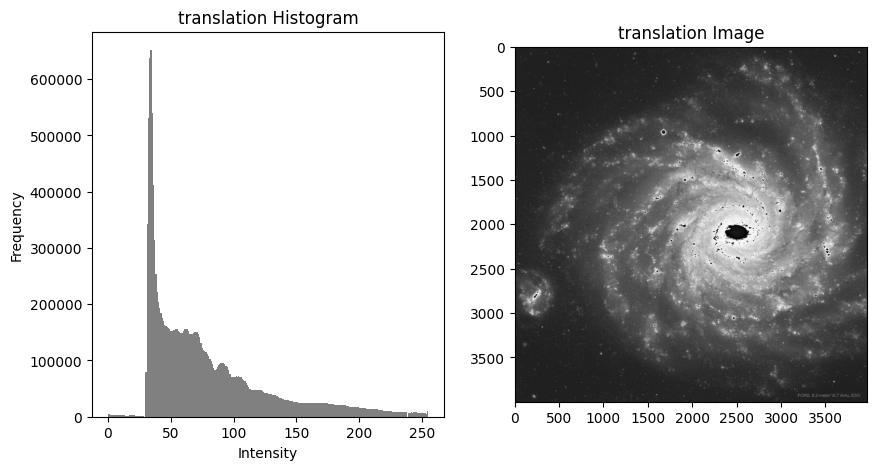

In [8]:
plot_histogram(linear_operation(galaxy,1,30),'translation')

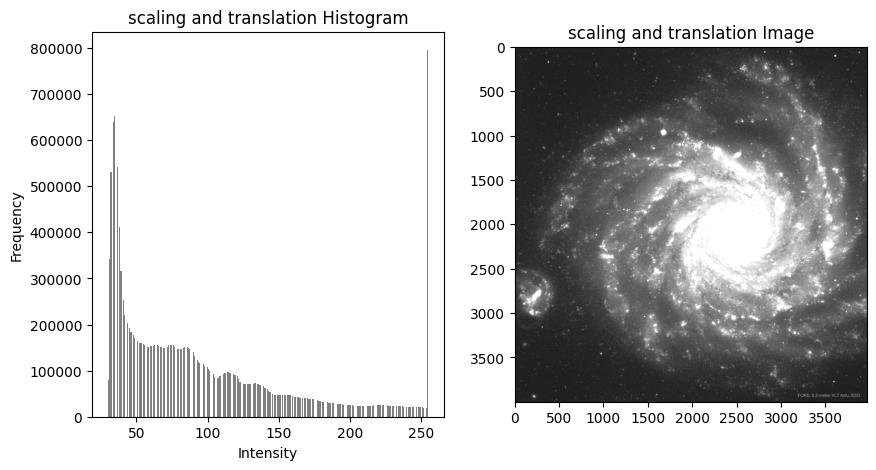

In [9]:
plot_histogram(linear_operation(galaxy,1.4,30),'scaling and translation')

- scaling (can chnage width of histogram)
- shifting (shift the histogram without changing shape)

2)

In [10]:
def fscs(I, L):
    I = np.array(I)
    A = np.min(I)
    B = np.max(I)
    print(f'min intensity: {A}')
    print(f'max intensity: {B}')
    
    if A == B:
        print('not possible')
        return
    
    P = (L - 1)/(B - A)
    Q = (-A*(L - 1))/(B - A)
    
    return linear_operation(I, P, Q)

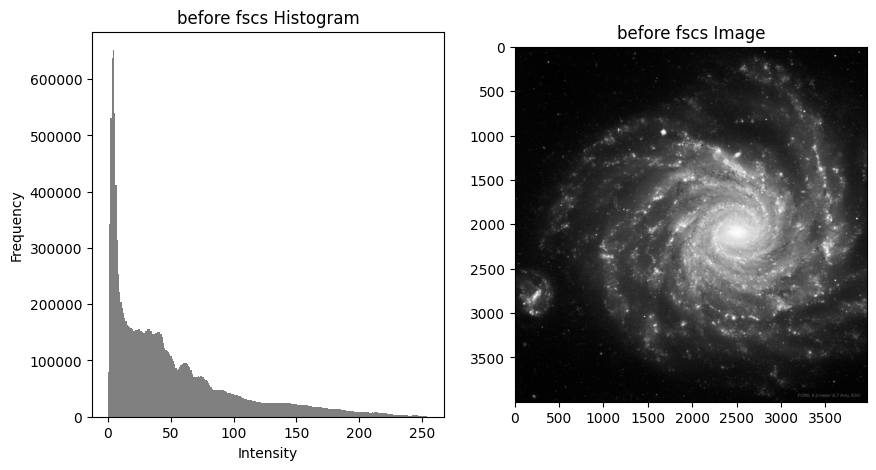

min intensity: 0
max intensity: 255


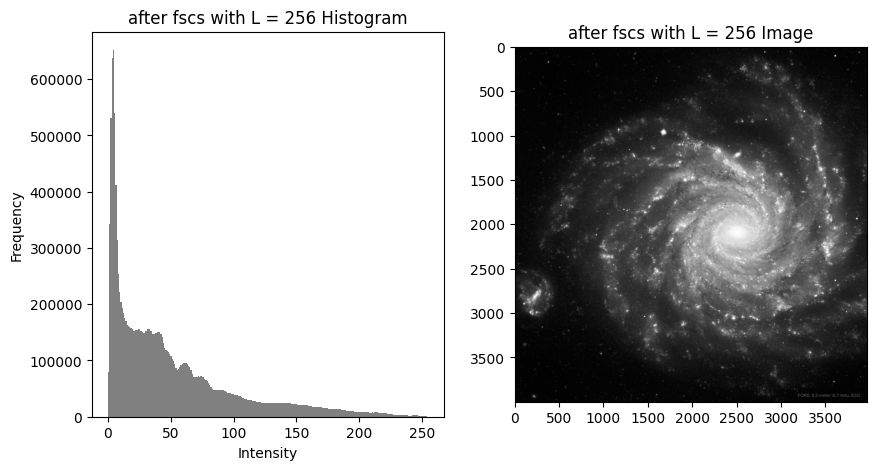

In [56]:
plot_histogram(galaxy,"before fscs")
new_image = fscs(galaxy,256)
plot_histogram(new_image,"after fscs with L = 256")

3)

In [45]:
def log_compression(I):
    I = np.array(I)
    m, n = I.shape
    on = np.ones((m,n))
    on += np.abs(I)
    temp = np.log(on)
    print("min_log_transform",np.min(temp))
    print("max_log_transform",np.max(temp))
    return temp

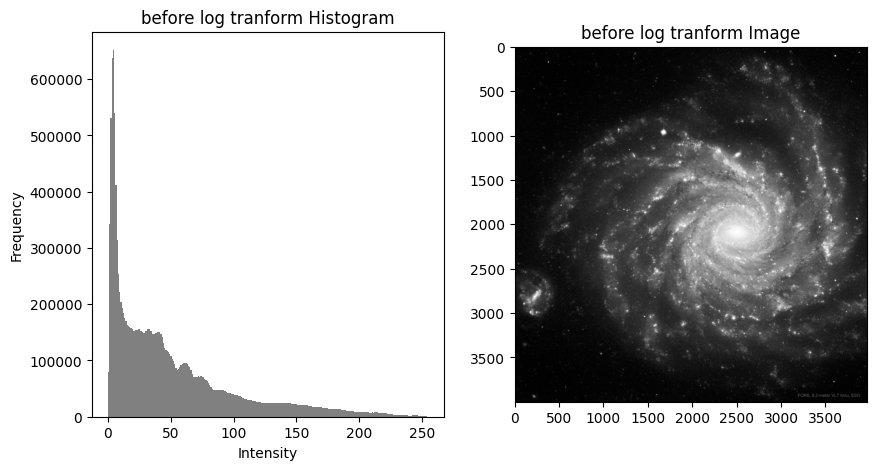

min 0
max 255
min intensity: 0.0
max intensity: 5.545177444479562


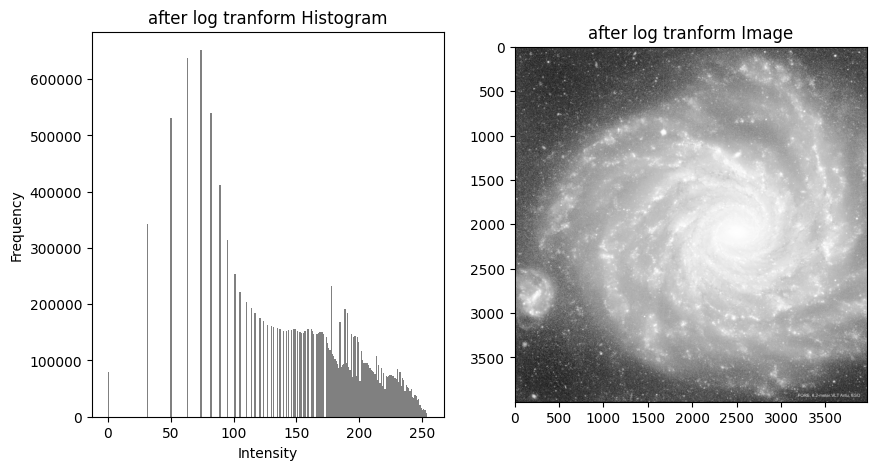

In [13]:
plot_histogram(galaxy,"before log tranform")
new_image = fscs(log_compression(galaxy),256)
plot_histogram(new_image,"after log tranform")

4)

In [14]:
def gamma_correction(I, gamma):
    I = np.array(I)
    new_I = np.power(I, gamma)
    new_I = np.clip(new_I, 0, 255)
    return new_I

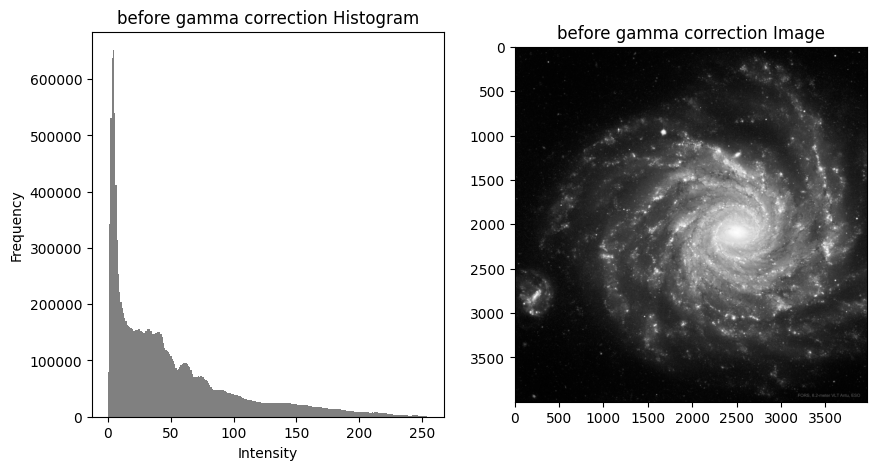

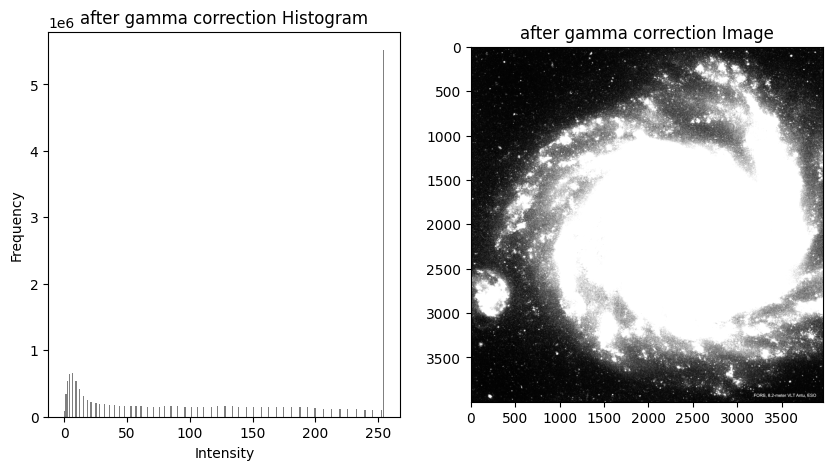

In [15]:
plot_histogram(galaxy,"before gamma correction")
new_image = gamma_correction(galaxy,1.4)
plot_histogram(new_image,"after gamma correction")

5)

In [16]:
def histogram_flattening(I):
    I = np.array(I)
    flat_I = I.flatten()
    freq = np.zeros(256)

    for i in flat_I:
        freq[i] += 1
    total = len(flat_I)
    freq /= total
    cummulative_prob = 0
    mapping = np.zeros(256)
    
    for i in range(256):
        cummulative_prob += freq[i]
        mapping[i] = round((255) * cummulative_prob)

    new_I = np.zeros_like(I)
    for i in range(len(I)):
        for j in range(len(I[0])):
            new_I[i][j] = mapping[I[i][j]]

    return new_I 

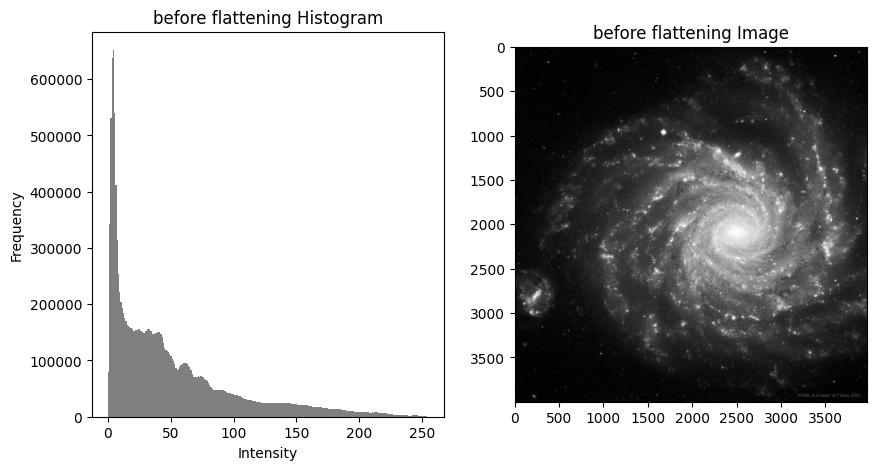

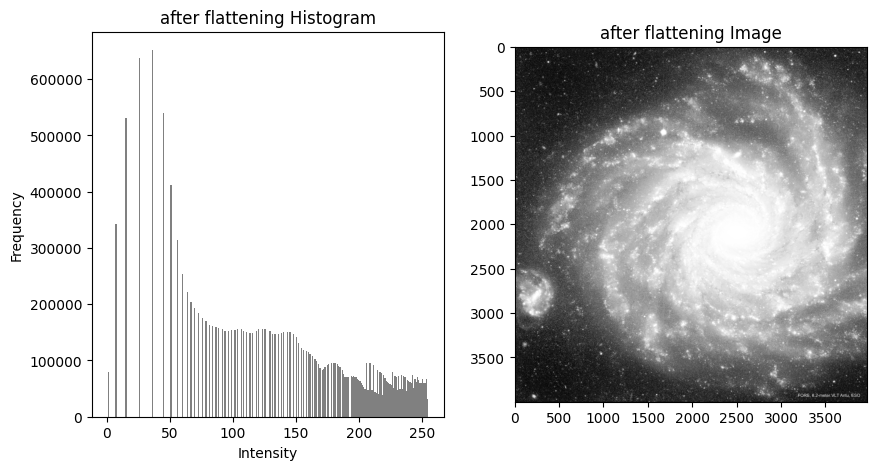

In [17]:
plot_histogram(galaxy,"before flattening")
new_image = histogram_flattening(galaxy)
plot_histogram(new_image,"after flattening")

- histogram flattening enhances global contrast effective for low contrast but in this case as there is high contrast it doest help much.

## Question 2

In [18]:
# urllib.request.urlretrieve("https://apod.nasa.gov/apod/image/2401/Full_Moon_Jan_24_Beletsky.jpg", "moon.jpg")
# urllib.request.urlretrieve("https://apod.nasa.gov/apod/image/2312/MoonAligned_Minato_2974.jpg", "minato.jpg")

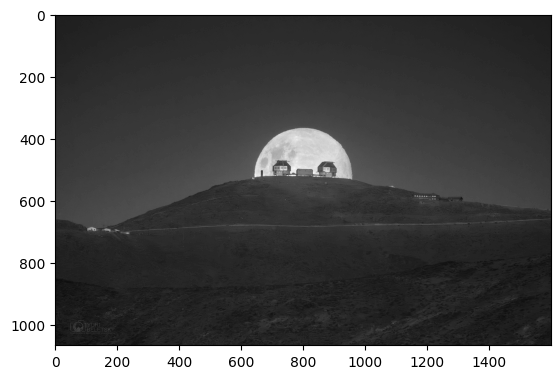

In [19]:
color_image_1 = Image.open("moon.jpg")
moon = color_image_1.convert("L")
plt.imshow(moon, cmap='gray')
plt.show()

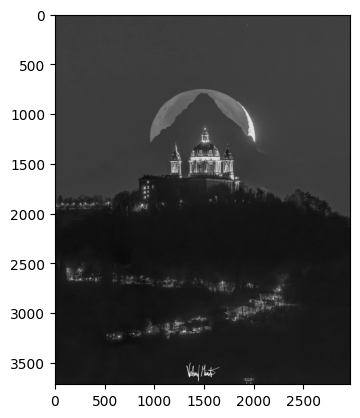

In [20]:
color_image_2 = Image.open("minato.jpg")
minato = color_image_2.convert("L")
plt.imshow(minato, cmap='gray')
plt.show()

1)

In [21]:
def zoom_nearest_neighbour(I,zoom):
    I = np.array(I)
    w = len(I[0])
    h = len(I)
    new_w = int(w*zoom)
    new_h = int(h*zoom)
    
    new_I = np.zeros((new_h, new_w), dtype=I.dtype)
    for i in range(new_h):
        for j in range(new_w):
            x = int(round(i / zoom)) # x,y nesrest original coordinates reference
            y = int(round(j / zoom))
            if x >= h or y >= w:
                new_I[i, j] = I[min(x,h),min(y,w)]
            else:
                new_I[i, j] = I[x,y]

    return new_I

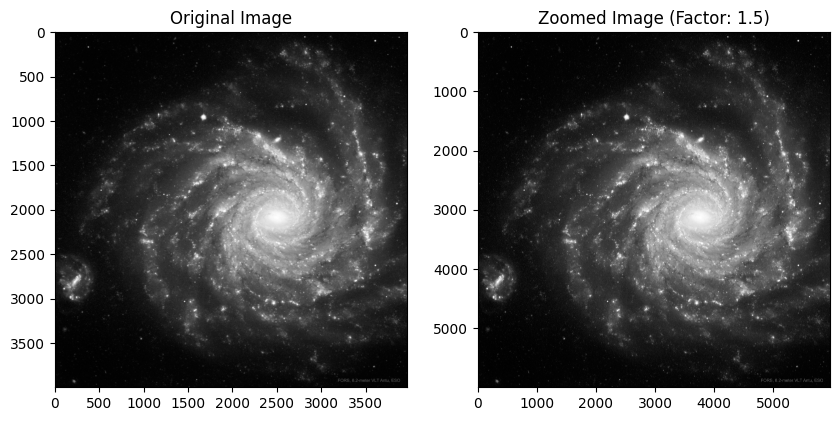

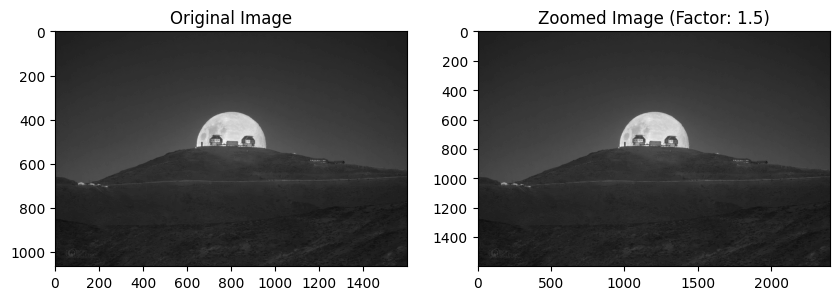

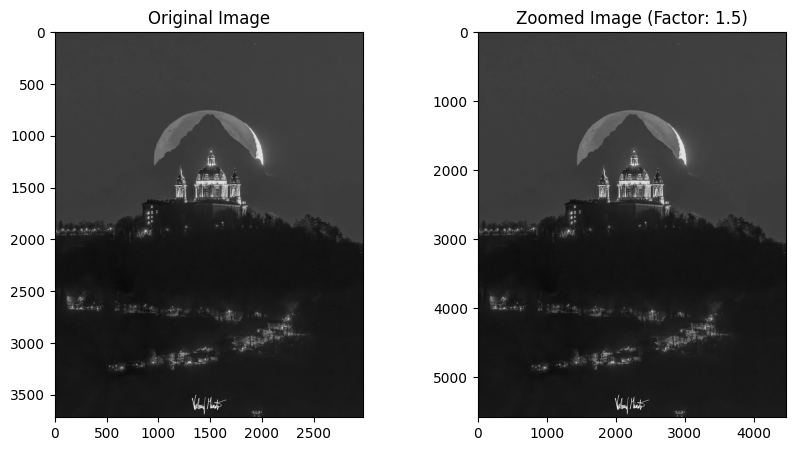

In [22]:
def show_zoomed_nearest_neighbour(image, zoom_factor):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')

    zoomed_image = zoom_nearest_neighbour(image,zoom_factor)
    axes[1].imshow(zoomed_image, cmap='gray')
    axes[1].set_title(f'Zoomed Image (Factor: {zoom_factor})')
    plt.show()

show_zoomed_nearest_neighbour(galaxy, 1.5)
show_zoomed_nearest_neighbour(moon, 1.5)
show_zoomed_nearest_neighbour(minato, 1.5)

2)

In [23]:
def zoom_bilinear(I, zoom):
    I = np.array(I)
    h, w = I.shape
    new_w = int(w * zoom)
    new_h = int(h * zoom)
    
    new_I = np.zeros((new_h, new_w), dtype=I.dtype)
    for i in range(new_h):
        for j in range(new_w):
            x = i / zoom  # x,y original coordinates reference
            y = j / zoom

            x_0 = int(floor(x))
            y_0 = int(floor(y))

            x_1 = min(x_0 + 1, h - 1)
            y_1 = min(y_0 + 1, w - 1)

            temp1 = (x_1 - x) * I[x_0, y_0] + (x - x_0) * I[x_0, y_1]
            temp2 = (x_1 - x) * I[x_1, y_0] + (x - x_0) * I[x_1, y_1]
            temp3 = (y_1 - y) * temp1 + (y - y_0) * temp2
            new_I[i, j] = temp3
    return new_I

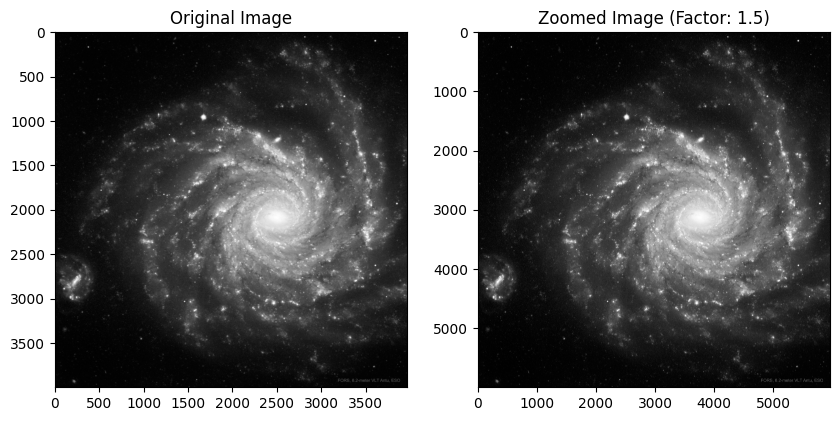

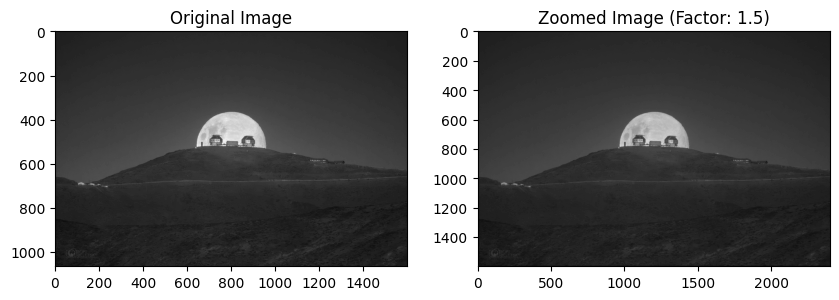

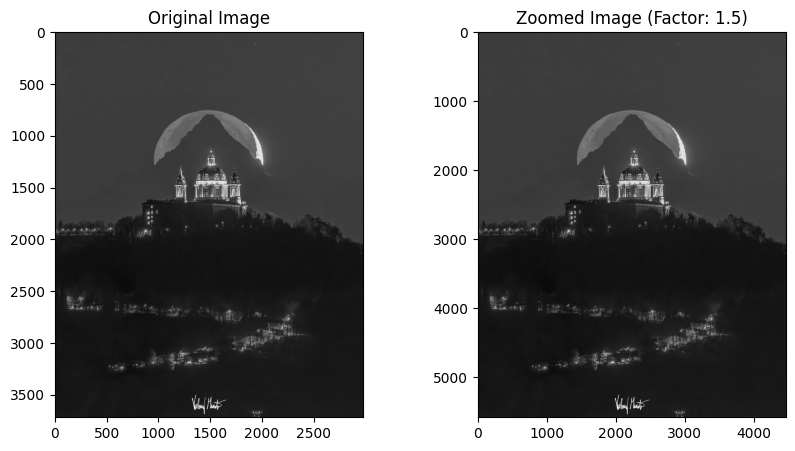

In [24]:
def show_zoomed_bilinear(image, zoom_factor):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')

    zoomed_image = zoom_bilinear(image, zoom_factor)
    axes[1].imshow(zoomed_image, cmap='gray')
    axes[1].set_title(f'Zoomed Image (Factor: {zoom_factor})')
    plt.show()

show_zoomed_bilinear(galaxy, 1.5)
show_zoomed_bilinear(moon, 1.5)
show_zoomed_bilinear(minato, 1.5)

- In theory, bilinear interpolation is better as the color is sampled more smoothly, but in this 1.5x zoom with the kind of images we have , it's not sufficient enough to visually tell the difference. Almost both methods yield kind of the same quality, at least from the eye perspective.

- Also, the time complexity of both methods is $(O(m \times n)$, but in bilinear interpolation, we do three extra steps to find the color by taking bilinear interpolation, so it takes more time.

## Question 3

1)

In [25]:
def dft_first_principle(I):
    I = np.array(I)
    m, n = I.shape
    F_I = np.zeros(I.shape, dtype=np.complex128)

    u = np.arange(m)
    v = np.arange(n)

    x = np.zeros((m, n))
    y = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            x[i, j] = i
            y[i, j] = j

    for u_ in u:
        for v_ in v:
            F_I[u_, v_] = np.sum(I * np.exp(-2j*np.pi*((u_*x/m)+(v_*y/n))))

    return F_I

def idft_first_principle(F_I):
    m, n = F_I.shape
    I = np.zeros(F_I.shape, dtype=np.complex128)

    u = np.arange(m)
    v = np.arange(n)

    x = np.zeros((m, n))
    y = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            x[i, j] = i
            y[i, j] = j

    for u_ in u:
        for v_ in v:
            I[u_, v_] = np.sum(F_I * np.exp(2j * np.pi * (u_*x/m + v_*y/n)))
    I = I/(m * n)
    return np.abs(I)

2)

In [67]:
def dft_complex_matrix(I):
    I = np.array(I)
    m, n = I.shape
    W_m = np.zeros((m, m), dtype=np.complex128)  
    W_n = np.zeros((n, n), dtype=np.complex128) 

    for i in range(m):
        for j in range(m):
            W_m[i, j] = np.exp(-2j*np.pi*i*j/m)

    for i in range(n):
        for j in range(n):
            W_n[i, j] = np.exp(-2j*np.pi*i*j/n)

    F_I = W_m @ I @ W_n
    return F_I

def idft_complex_matrix(F_I):
    m, n = F_I.shape
    max_val = max(n, m)
    W_m = np.zeros((m, m), dtype=np.complex128)  
    W_n = np.zeros((n, n), dtype=np.complex128)  

    for i in range(m):
        for j in range(m):
            W_m[i, j] = np.exp(2j*np.pi*i*j/m)

    for i in range(n):
        for j in range(n):
            W_n[i, j] = np.exp(2j*np.pi*i*j/n)

    I = W_m @ F_I @ W_n
    I = I / (m * n)
    return np.abs(I)

1)

In [27]:
def magnitude(F_I):
    magnitude_matrix = np.abs(F_I)
    return magnitude_matrix

def phase(F_I):
    phase_matrix = np.angle(F_I)
    return phase_matrix

In [65]:
def visualize_images(image):
    plt.figure(figsize=(12, 8))
    # Display original image
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    image_dft = dft_first_principle(image)
    m_temp = magnitude(image_dft)

    plt.subplot(2, 2, 2)
    plt.imshow(fscs(m_temp,256), cmap='gray')
    plt.title('DFT Magnitude')

    plt.subplot(2, 2, 3)
    plt.imshow(phase(image_dft), cmap='gray')
    plt.title('DFT Phase')
    
    plt.subplot(2, 2, 4)
    plt.imshow(log_compression(m_temp), cmap='gray')
    plt.title('Log Compression')
    plt.show()
    return 

min intensity: 7.63541892321092
max intensity: 9208271.0
min_log_transform 2.1558722249801487
max_log_transform 16.035612768478416


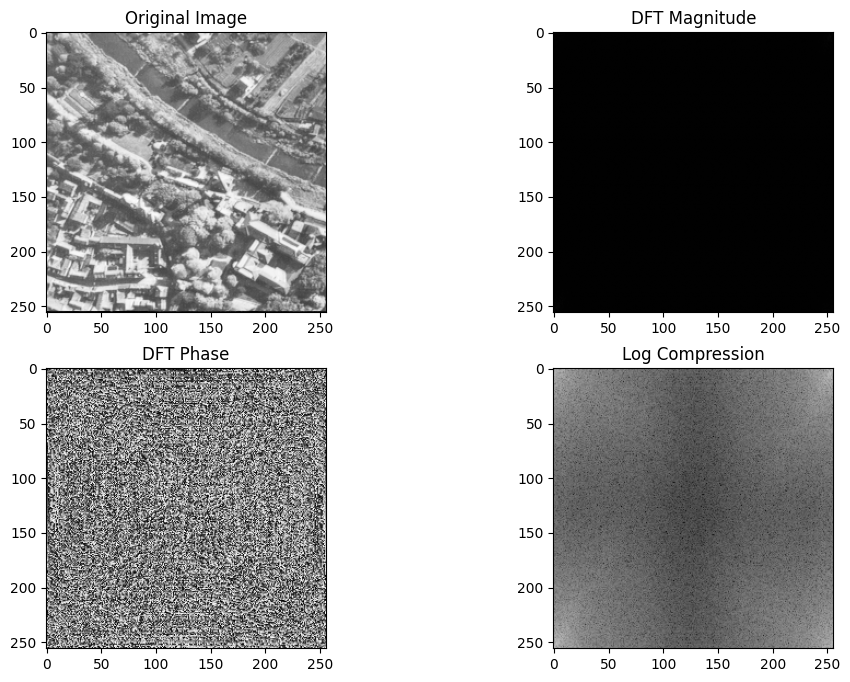

In [60]:
aerial = Image.open('misc/5.1.10.tiff')
visualize_images(aerial)

min intensity: 7.75103424070809
max intensity: 12188403.0
min_log_transform 2.1691718923226464
max_log_transform 16.315995565896433


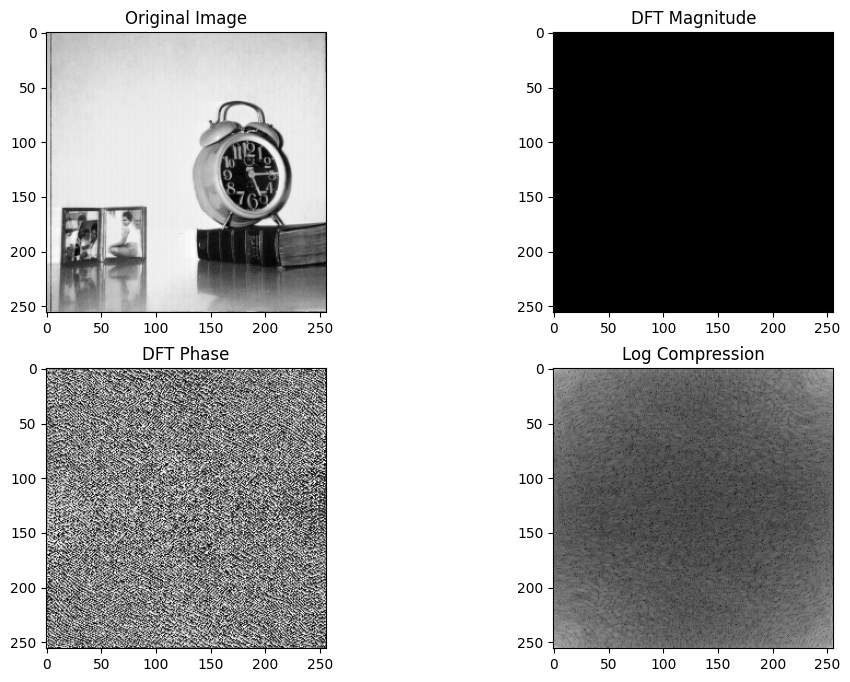

In [61]:
clock = Image.open('misc/5.1.12.tiff')
visualize_images(clock)

min intensity: 2.772693855622892
max intensity: 12684744.0
min_log_transform 1.3277892968533143
max_log_transform 16.355910648330212


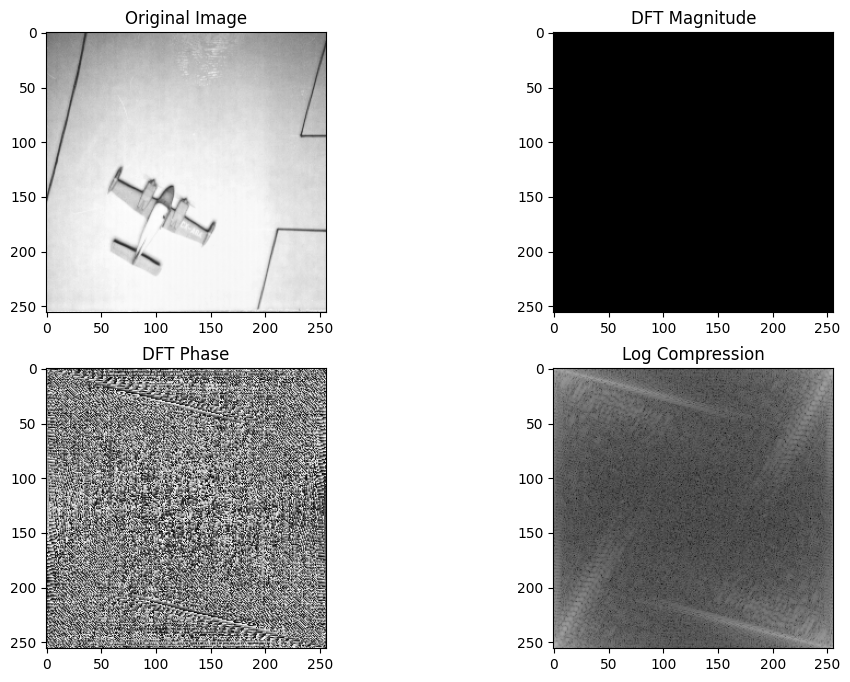

In [66]:
plane = Image.open('misc/5.1.11.tiff')
visualize_images(plane)

2)

In [32]:
def centered_dft(I):
    I = np.array(I)
    m, n = I.shape
    shifted_I = np.zeros((m, n), dtype=np.complex128)
    for i in range(m):
        for j in range(n):
            shifted_I[i, j] = (-1)**(i + j)
    F_I = dft_complex_matrix(shifted_I)
    return magnitude(F_I)

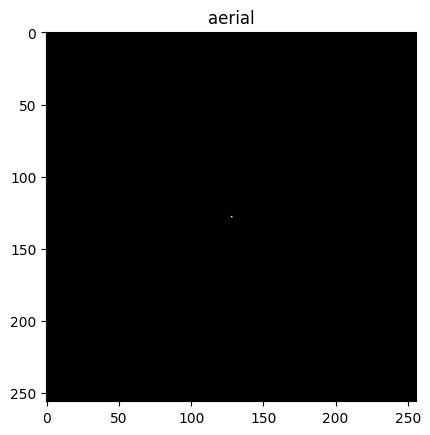

In [33]:
aerial_centered_dft = centered_dft(aerial)
plt.imshow(magnitude(aerial_centered_dft),cmap = 'gray')
plt.title('aerial')
plt.show()

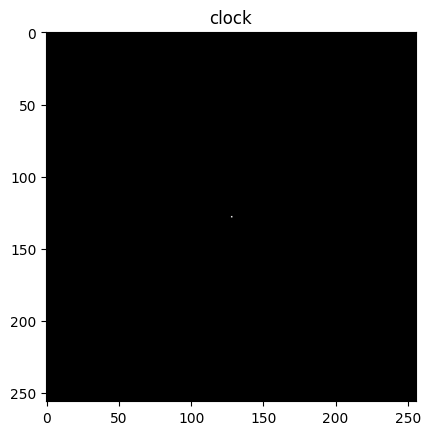

In [34]:
clock_centered_dft = centered_dft(clock)
plt.imshow(magnitude(clock_centered_dft),cmap = 'gray')
plt.title('clock')
plt.show()

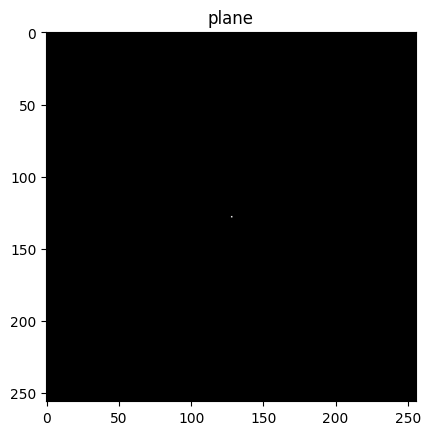

In [35]:
plane_centered_dft = centered_dft(plane)
plt.imshow(magnitude(plane_centered_dft),cmap = 'gray')
plt.title('plane')
plt.show()

3)

In [36]:
new_plane = idft_first_principle(dft_first_principle(plane))

difference = np.sum(np.abs(new_plane - plane))
print(f'difference between the images is {difference}')

difference between the images is 4.565793323991971e-07


difference between the images is 3.235568826198687e-07


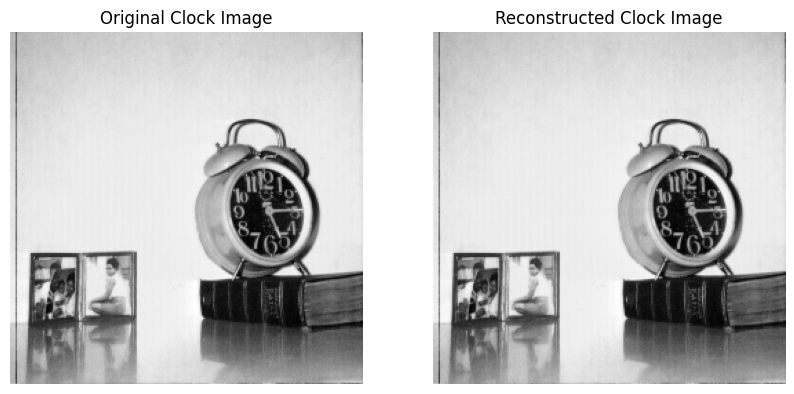

In [37]:
new_clock = idft_complex_matrix(dft_complex_matrix(clock))

difference = np.sum(np.abs(magnitude(new_clock)  - clock))
print(f'difference between the images is {difference}')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(clock, cmap='gray')
plt.title('Original Clock Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(new_clock), cmap='gray')
plt.title('Reconstructed Clock Image')
plt.axis('off')

plt.show()

- we can see the differnce is almost 0 for both methods so the images formed are identical hence $IDFT[DFT[I]] = I$

4)

In [38]:
def phase_importance(image):
    plt.figure(figsize=(12, 8))
    image_dft = dft_complex_matrix(image)
    m_temp = magnitude(image_dft)
    p_temp = phase(image_dft)
    
    # Transposing phase magnitude
    plt.subplot(1, 3, 1)
    transposed_phase_mag = magnitude(idft_complex_matrix(m_temp*np.exp(1j* p_temp.T)))
    plt.imshow(transposed_phase_mag,cmap = 'gray')
    plt.title('Transposed Phase Magnitude')

    # Phase = 0
    plt.subplot(1, 3, 2)
    plt.imshow(magnitude(idft_complex_matrix(m_temp*np.exp(1j*0))),cmap = 'gray')
    plt.title('Magnitude Spectrum')

    # Adding noise to phase
    noisy = p_temp + np.random.normal(0,1,p_temp.shape)
    plt.subplot(1, 3, 3)
    noisy_phase_mag = magnitude(idft_complex_matrix(m_temp*np.exp(1j*noisy)))
    plt.imshow(noisy_phase_mag,cmap = 'gray')
    plt.title('Noisy Phase Magnitude')
    plt.show()
    return

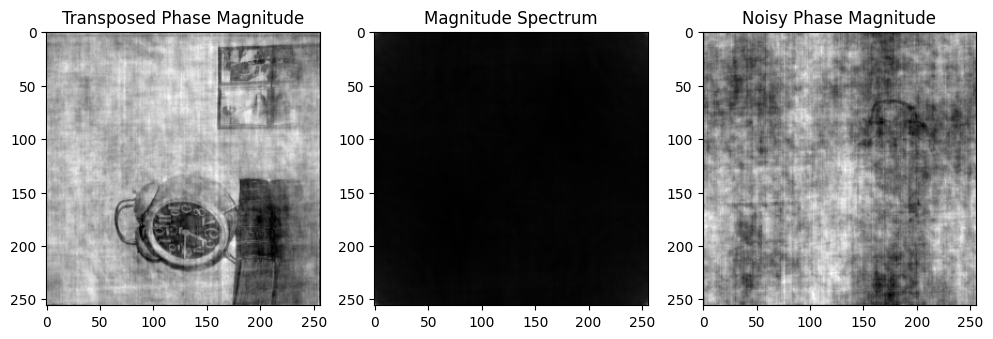

In [39]:
phase_importance(clock)

* we can see from the above images phase contains most information about the images and transposing the phase and taking idft gives rotated images even though the pases are unchanged.
* when we make the phase as 0 the image is no at all visible even though amplitudes are retained
* adding small noise slightly disturbed the image completely.so phase is imortant for image